# Tensorflow

In [3]:
# import
import numpy as np
import tensorflow as tf

0-d Tensors:

In [4]:
sport = tf.constant('Tennis', tf.string)
pi = tf.constant(3.141592, tf.float64)

In [5]:
print(f'sport is a {tf.rank(sport).numpy()}')
print(f'pi is a {tf.rank(pi).numpy()}')

sport is a 0
pi is a 0


1-d Tensors:

In [6]:
sports = tf.constant(['Tennis', 'Basketball'], tf.string)
numbers = tf.constant([3.141592, 1.414213, 2.71821], tf.float64)

In [15]:
print(f'sport is a {tf.rank(sports).numpy()}')
print(f'pi is a {tf.rank(numbers).numpy()}')

sport is a 1
pi is a 1


## Computations on Tensors

In [16]:
a = tf.constant(27)
b = tf.constant(32)

Add

In [18]:
c1 = tf.add(a, b)
print(c1)

tf.Tensor(59, shape=(), dtype=int32)


In [19]:
c2 = a + b
print(c2)

tf.Tensor(59, shape=(), dtype=int32)


Tensor computation

In [20]:
def func(a, b):
    return (a + b) * (b - 1)

In [21]:
a, b = 1.5, 2.5
c1 = func(a, b)
print(c1)

6.0


## Neural networks in TensorFlow

In [24]:
class Dense(tf.keras.layers.Layer):
    def __init__(self, n_output_nodes):
        super(Dense, self).__init__()
        self.n_output_nodes = n_output_nodes
        
    def build(self, input_shape):
        d = int(input_shape[-1])
        # initialize parameters (weights and biases)
        self.W = self.add_weight('weights', shape=[d, self.n_output_nodes])
        self.b = self.add_weight('biases', shape=[1, self.n_output_nodes])
        
    def call(self, x):
        z = tf.matmul(x, self.W) + b
        
        a = tf.sigmoid(z)
        
        return a

In [28]:
layer = Dense(2)
layer.build((1, 3))
x_input = tf.constant([[1., 2., 3.]], shape=(1, 3))
y = layer.call(x_input)

print(y.numpy())

[[0.14959235 0.28079373]]


### Keras API

In [30]:
# import
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Sequential Model

In [ ]:
# build model
model = Sequential()
model.add(Dense(units=3, activation='sigmoid'))

In [32]:
# predict
model.call(x_input)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.4231848 , 0.20146888, 0.00948974]], dtype=float32)>

Subclassing Model

In [35]:
class Model(tf.keras.Model):
    def __init__(self, n_output_layers):
        super(Model, self).__init__()
        self.dense_layer = Dense(units=n_output_layers, activation='sigmoid')
        
    def call(self, inputs):
        return self.dense_layer(inputs)

In [36]:
# num of output layers
n = 3
model = Model(n)
model.call(x_input)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[0.4231848 , 0.20146888, 0.00948974]], dtype=float32)>

## Automatic differentiation in Tensorflow

In [39]:
# y = x^2
x = tf.Variable(4.0)

with tf.GradientTape() as tape:
    y = x * x

dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(8.0, shape=(), dtype=float32)


More about GradientTape

In [44]:
x = tf.Variable([tf.random.normal([1])])
print("Initializing x={}".format(x.numpy()))

# learning rate
lr = 1e-2
hist = []

# target value
x_f = 5

# run SGD for a number of itr
# compute the derivative of the loss with respect to x and perform the sgd update
for i in range(500):
    with tf.GradientTape() as tape:
        loss = (x - x_f) * (x - x_f)
        
    grad = tape.gradient(loss, x)  # compute the derivative of the loss respect to x
    new_x = x - lr * grad          # update 
    x.assign(new_x)
    hist.append(x.numpy()[0])

Initializing x=[[-0.883817]]


Visualize

Text(0, 0.5, 'x value')

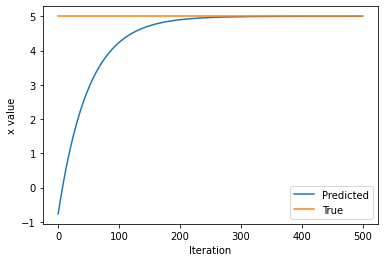

In [45]:
import matplotlib.pyplot as plt

plt.plot(hist)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')

Source: https://github.com/aamini/introtodeeplearning/